In [1]:
!pip install statsmodels --upgrade

Inserting directories

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

Importing data

In [4]:
df=pd.read_csv('IDEA.csv',index_col=0,usecols=[0,1],parse_dates=True)
X=df.values
print('shape of data \t',df.shape)
print('original dataset:\n',df.head());
print('after extracting only stocks openings:\n',X)

shape of data 	 (251, 1)
original dataset:
              Open
Date             
2020-08-06  11.55
2020-09-06  12.35
2020-10-06   9.70
2020-11-06  11.10
2020-12-06   8.50
after extracting only stocks openings:
 [[11.55]
 [12.35]
 [ 9.7 ]
 [11.1 ]
 [ 8.5 ]
 [10.8 ]
 [10.3 ]
 [ 9.35]
 [ 9.85]
 [ 9.75]
 [ 9.2 ]
 [10.1 ]
 [10.35]
 [ 9.4 ]
 [ 9.8 ]
 [10.6 ]
 [11.45]
 [10.4 ]
 [10.2 ]
 [10.1 ]
 [10.1 ]
 [ 9.8 ]
 [ 9.6 ]
 [ 9.25]
 [ 9.2 ]
 [10.  ]
 [ 9.65]
 [ 9.2 ]
 [ 8.65]
 [ 7.6 ]
 [ 9.4 ]
 [ 8.95]
 [ 8.45]
 [ 8.9 ]
 [ 8.4 ]
 [ 8.2 ]
 [ 8.05]
 [ 8.  ]
 [ 8.25]
 [ 8.1 ]
 [ 8.4 ]
 [ 8.7 ]
 [ 8.6 ]
 [ 8.3 ]
 [ 7.9 ]
 [ 9.  ]
 [ 8.9 ]
 [ 8.6 ]
 [ 8.95]
 [ 9.  ]
 [ 9.05]
 [ 8.95]
 [ 8.75]
 [ 8.6 ]
 [ 8.6 ]
 [ 8.65]
 [ 9.15]
 [ 9.  ]
 [ 8.9 ]
 [ 8.95]
 [10.5 ]
 [10.8 ]
 [ 9.3 ]
 [10.5 ]
 [11.3 ]
 [13.25]
 [12.5 ]
 [10.95]
 [11.3 ]
 [11.4 ]
 [11.35]
 [11.85]
 [11.8 ]
 [11.4 ]
 [11.2 ]
 [11.25]
 [10.35]
 [10.  ]
 [ 8.95]
 [ 9.35]
 [10.75]
 [10.1 ]
 [ 9.8 ]
 [ 9.3 ]
 [ 9.25]
 [ 9.1 ]
 [ 8.8 ]
 [ 8.55

<AxesSubplot:xlabel='Date'>

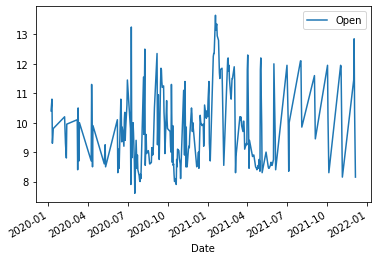

In [25]:
df.plot()

Checking for Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Open'],autolag = 'AIC')

print("1. ADF : ",dftest[0]);
print("2. P-value : ",dftest[1]);
print("3. Num. of lags : ",dftest[2]);
print("4. Num. of observation used for ADF regression and critical values calculation :",dftest[3])
print("5. critical values: ")
for key,val in dftest[4].items():
    print("\t",key, ": ",val)

1. ADF :  -2.6209159975047958
2. P-value :  0.08875094827616387
3. Num. of lags :  16
4. Num. of observation used for ADF regression and critical values calculation : 234
5. critical values: 
	 1% :  -3.4586084859607156
	 5% :  -2.873972159235721
	 10% :  -2.57339565928848


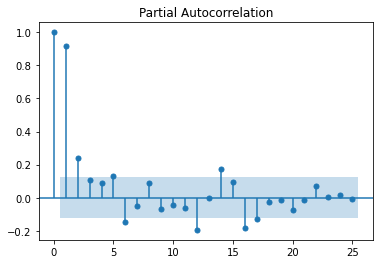

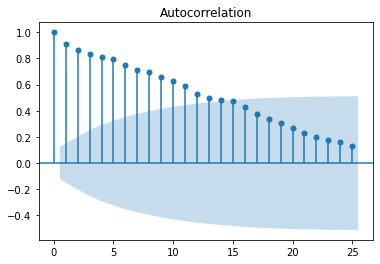

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df['Open'],lags=25)
acf=plot_acf(df['Open'],lags=25)


Split dataset intro train and test: testing : last 7 days

In [29]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [34]:
model=AutoReg(train,lags=10).fit()

C:\dell\Anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [31]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  244
Model:                    AutoReg(10)   Log Likelihood                -148.851
Method:               Conditional MLE   S.D. of innovations              0.457
Date:                Wed, 09 Jun 2021   AIC                             -1.463
Time:                        22:36:08   BIC                             -1.286
Sample:                            10   HQIC                            -1.392
                                  244                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4611      0.242      1.905      0.057      -0.013       0.935
y.L1           0.8468      0.065     12.953      0.000       0.719       0.975
y.L2          -0.0644      0.086     -0.753      0.4

Make predictions on test set and compare

In [ ]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)

[8.60304156 8.67132458 8.72029005 8.7517317  8.77285192 8.81857054
 8.86506812]


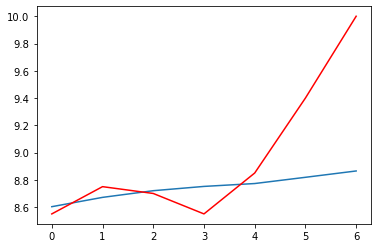

In [22]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)

Calculation of error

In [32]:
 from math import sqrt
 from sklearn.metrics import mean_squared_error
 rmse=sqrt(mean_squared_error(test,pred))



In [33]:
print(rmse)

0.4902175910957742


Making future Predictions 


In [23]:
pred_future=model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print("the future prediction for the next week")
print(pred_future)
print("NUm. of predictions made:\t",len(pred_future))

the future prediction for the next week
[8.92309175 8.95711572 8.99120947 9.02368795 9.05004785 9.07805101
 9.10703733]
NUm. of predictions made:	 7
